In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

plt.style.use('seaborn-darkgrid')

In [29]:
loans = pd.read_csv('kiva_loans.csv')
regions = pd.read_csv('kiva_mpi_region_locations.csv')

In [30]:
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [31]:
loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [32]:
loans.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

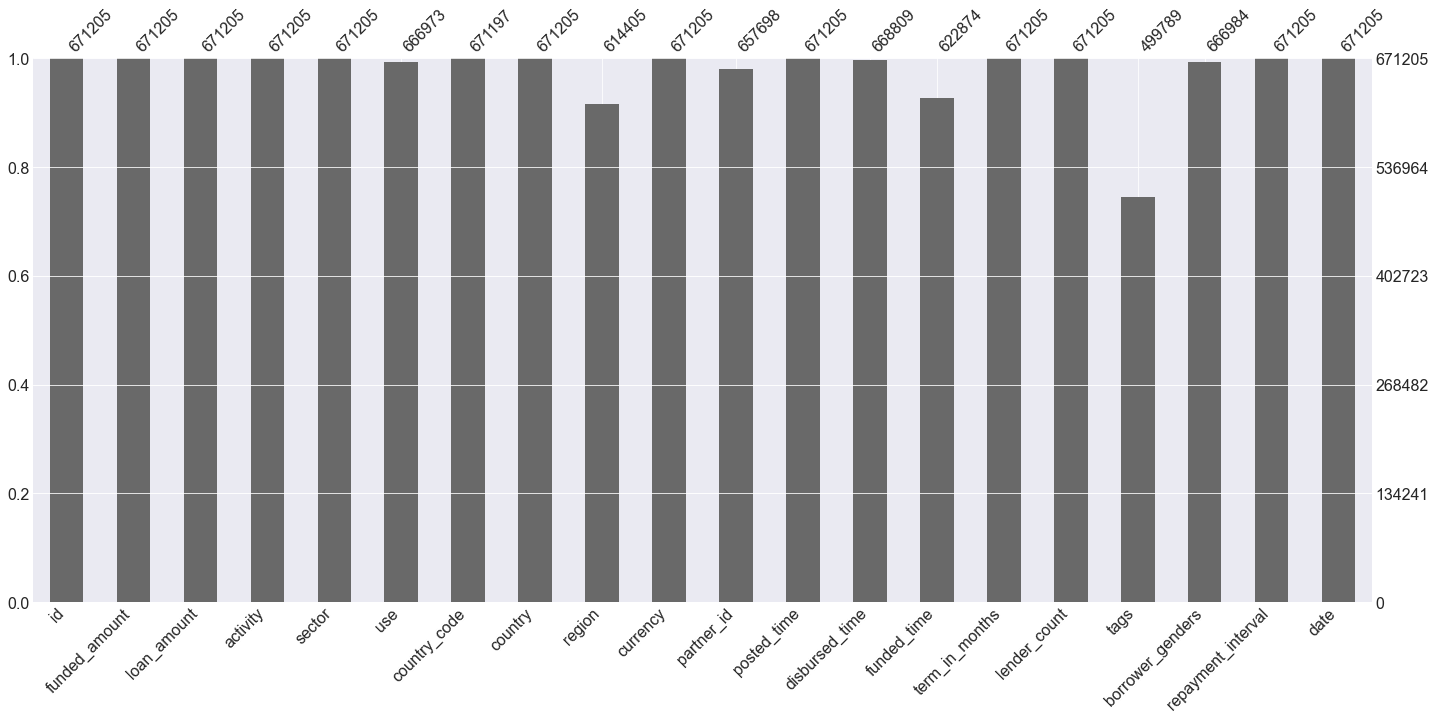

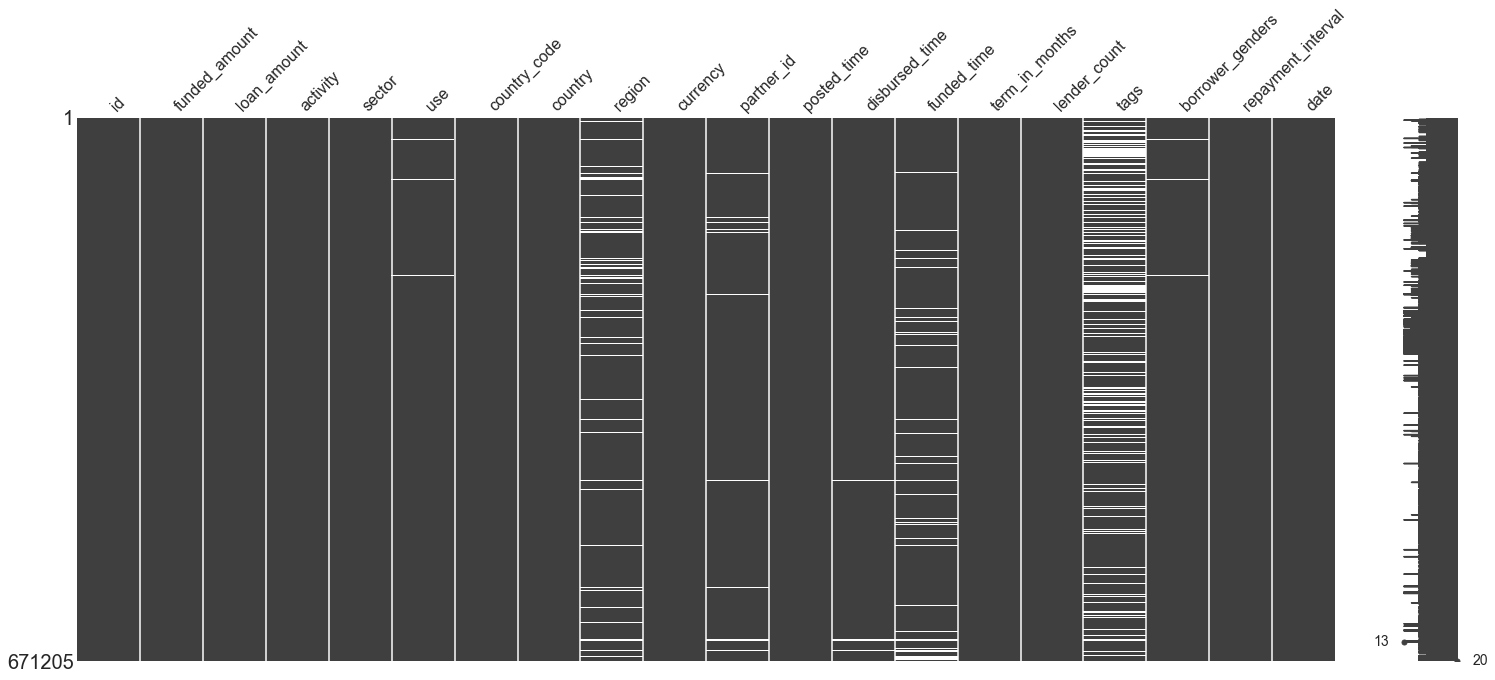

In [33]:
msno.bar(loans)
msno.matrix(loans)

In [34]:
loans.describe(include=np.number)

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [35]:
loans.describe(include=np.object)

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


In [36]:
loans.dropna(inplace=True)

In [37]:
countries = loans.country.value_counts()[loans.country.value_counts(normalize=True) > 0.005]
countries_list = list(countries.index)

In [38]:
countries

Philippines                             91317
Kenya                                   47261
Cambodia                                25787
Pakistan                                20681
Tajikistan                              15556
Colombia                                14683
Peru                                    14232
El Salvador                             13753
Uganda                                  12932
Ecuador                                 10153
Paraguay                                 8756
Vietnam                                  8634
Nicaragua                                8163
India                                    7298
Bolivia                                  6908
Armenia                                  6351
Palestine                                6178
Guatemala                                6018
Lebanon                                  5937
Nigeria                                  5933
Samoa                                    5526
Honduras                          

In [39]:
loans.query(f'country in {countries_list}', inplace=True)

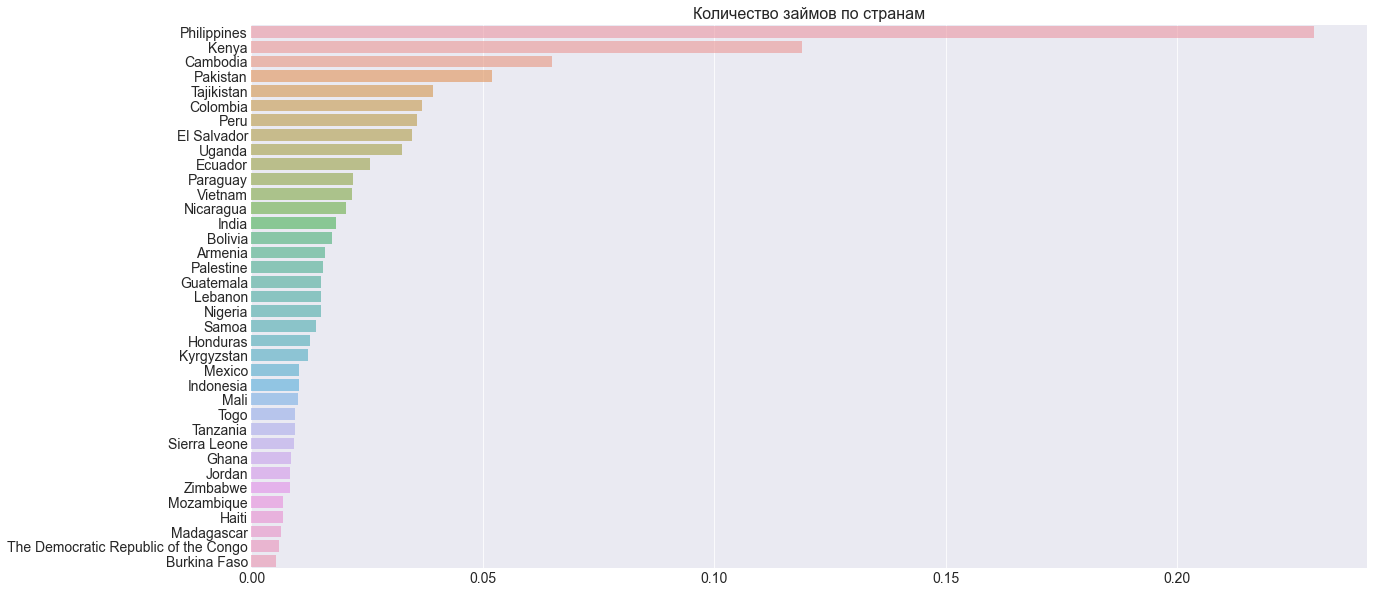

In [40]:
plt.figure(figsize=(20, 10))
plt.title('Количество займов по странам', fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values/countries.sum(), alpha=0.6)

In [41]:
regions.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


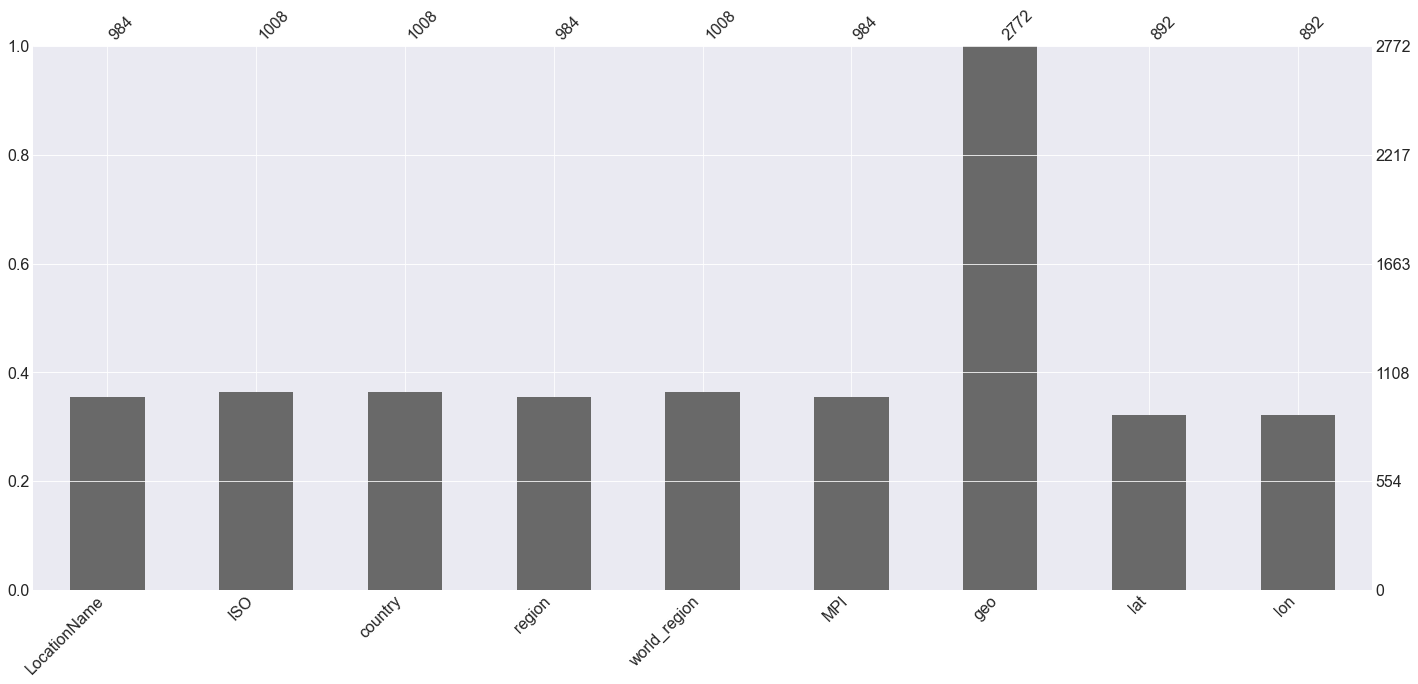

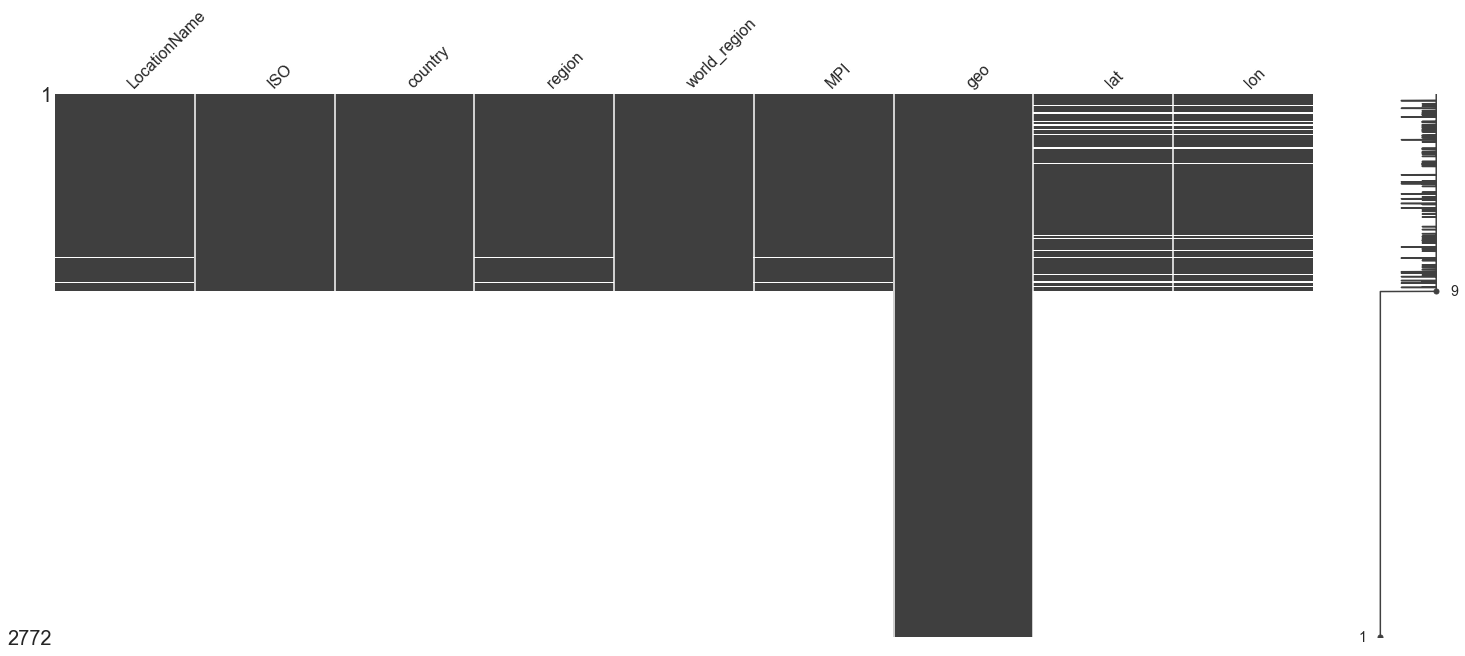

In [42]:
msno.bar(regions)
msno.matrix(regions)

In [43]:
# Get rid of lots of empty records.
regions.dropna(subset=['ISO', 'country', 'MPI'], inplace=True)

In [44]:
country_codes = pd.read_csv('countries.csv')
loans['ISO'] = loans.country_code.map(country_codes.set_index('Alpha-2 code')['Alpha-3 code'])

region_mpi = (
    regions[['ISO', 'world_region', 'MPI']]
    .groupby(['ISO', 'world_region'])
    .mean()
    .reset_index()
)
loans = loans.merge(region_mpi, how='left', on='ISO', copy=False)

In [45]:
regions_loans = loans.world_region.value_counts()
regions_loans

East Asia and the Pacific      129792
Sub-Saharan Africa              97670
Latin America and Caribbean     81570
South Asia                      20681
Europe and Central Asia         15556
Arab States                      3306
Name: world_region, dtype: int64

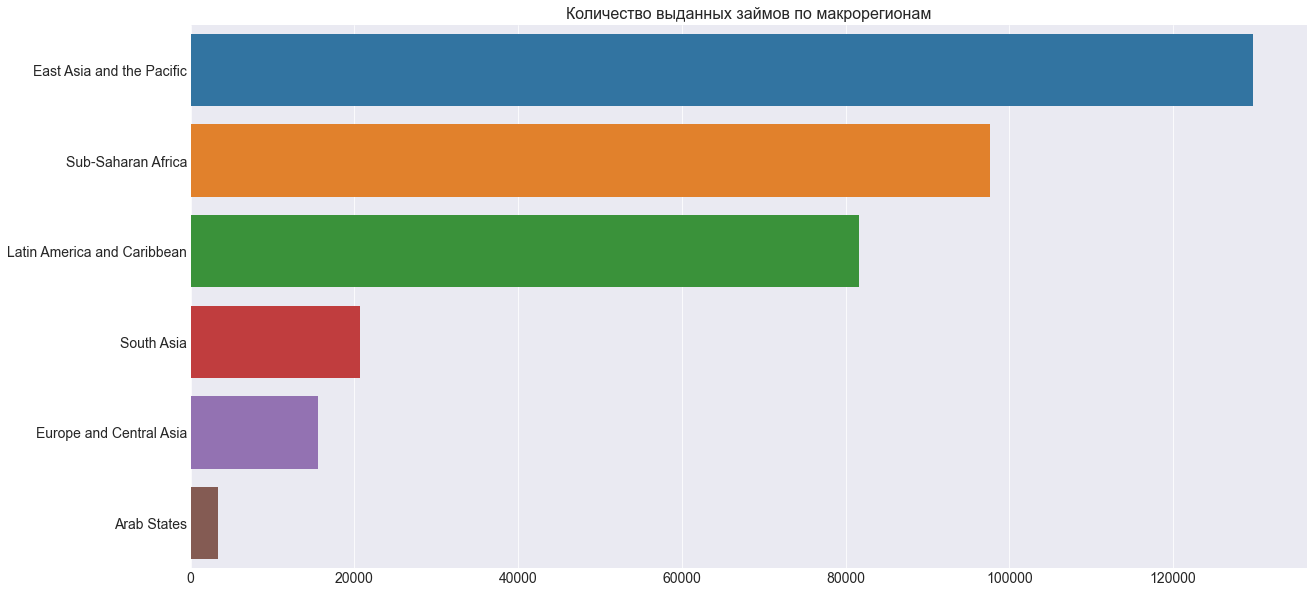

In [46]:
plt.figure(figsize=(20, 10))
plt.title('Количество выданных займов по макрорегионам', fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=regions_loans.index, x=regions_loans.values)

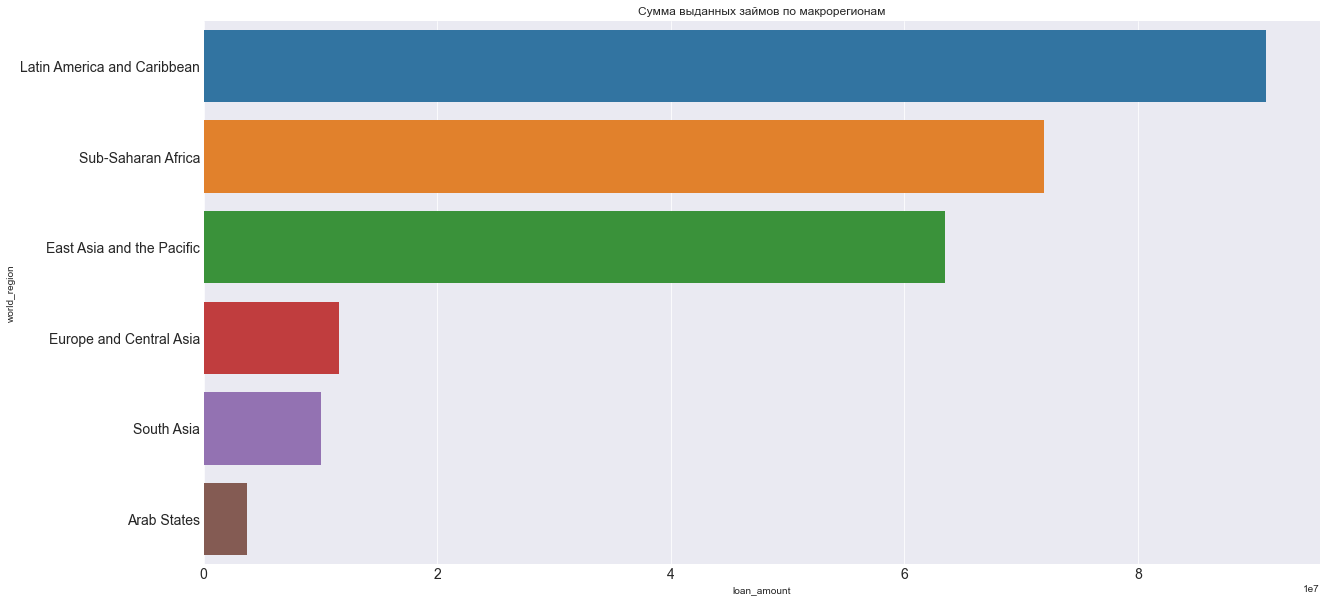

In [47]:
plt.figure(figsize=(20, 10))
plt.title('Сумма выданных займов по макрорегионам')
plt.tick_params(labelsize=14)
sns.barplot(y='world_region', x='loan_amount', 
            data=loans.pivot_table(
                index='world_region', values='loan_amount', aggfunc='sum')
            .reset_index()
            .sort_values('loan_amount', ascending=False)
           )

In [48]:
import re
# loans.borrower_genders.apply(lambda x: list(Counter(x.split(', '))))
loans = loans.assign(
    females=loans.borrower_genders.str.count('female', flags=re.I),
    males=loans.borrower_genders.str.count('(?:^|, )male', flags=re.I),
)
loans['borrowers_number'] = loans[['males', 'females']].apply('sum', axis=1)
loans['borrowers_consistency'] = loans[['males', 'females']].apply(lambda x: 'male' if x[1] == 0 else 'female' if x[0] == 0 else 'hetero', axis=1)
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,borrower_genders,repayment_interval,date,ISO,world_region,MPI,females,males,borrowers_number,borrowers_consistency
0,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,female,bullet,2014-01-01,IND,NaN,NaN,1,0,1,female
1,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,female,bullet,2014-01-01,IND,NaN,NaN,1,0,1,female
2,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,female,monthly,2014-01-01,PAK,South Asia,0.233167,1,0,1,female
3,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,female,monthly,2014-01-01,PAK,South Asia,0.233167,1,0,1,female
4,653089,400.0,400.0,General Store,Retail,"to buy stock of rice, sugar and flour .",PK,Pakistan,Faisalabad,PKR,...,female,monthly,2014-01-01,PAK,South Asia,0.233167,1,0,1,female


# Самостоятельная работа

## Страны, в которых преобладают мужчины и группы людей как заемщики

In [49]:
country_gender = (
    loans
    .assign(ones=1)
    .pivot_table(
        index='country', 
        columns='borrowers_consistency', 

        aggfunc='size'
    )
    .fillna(0)
)

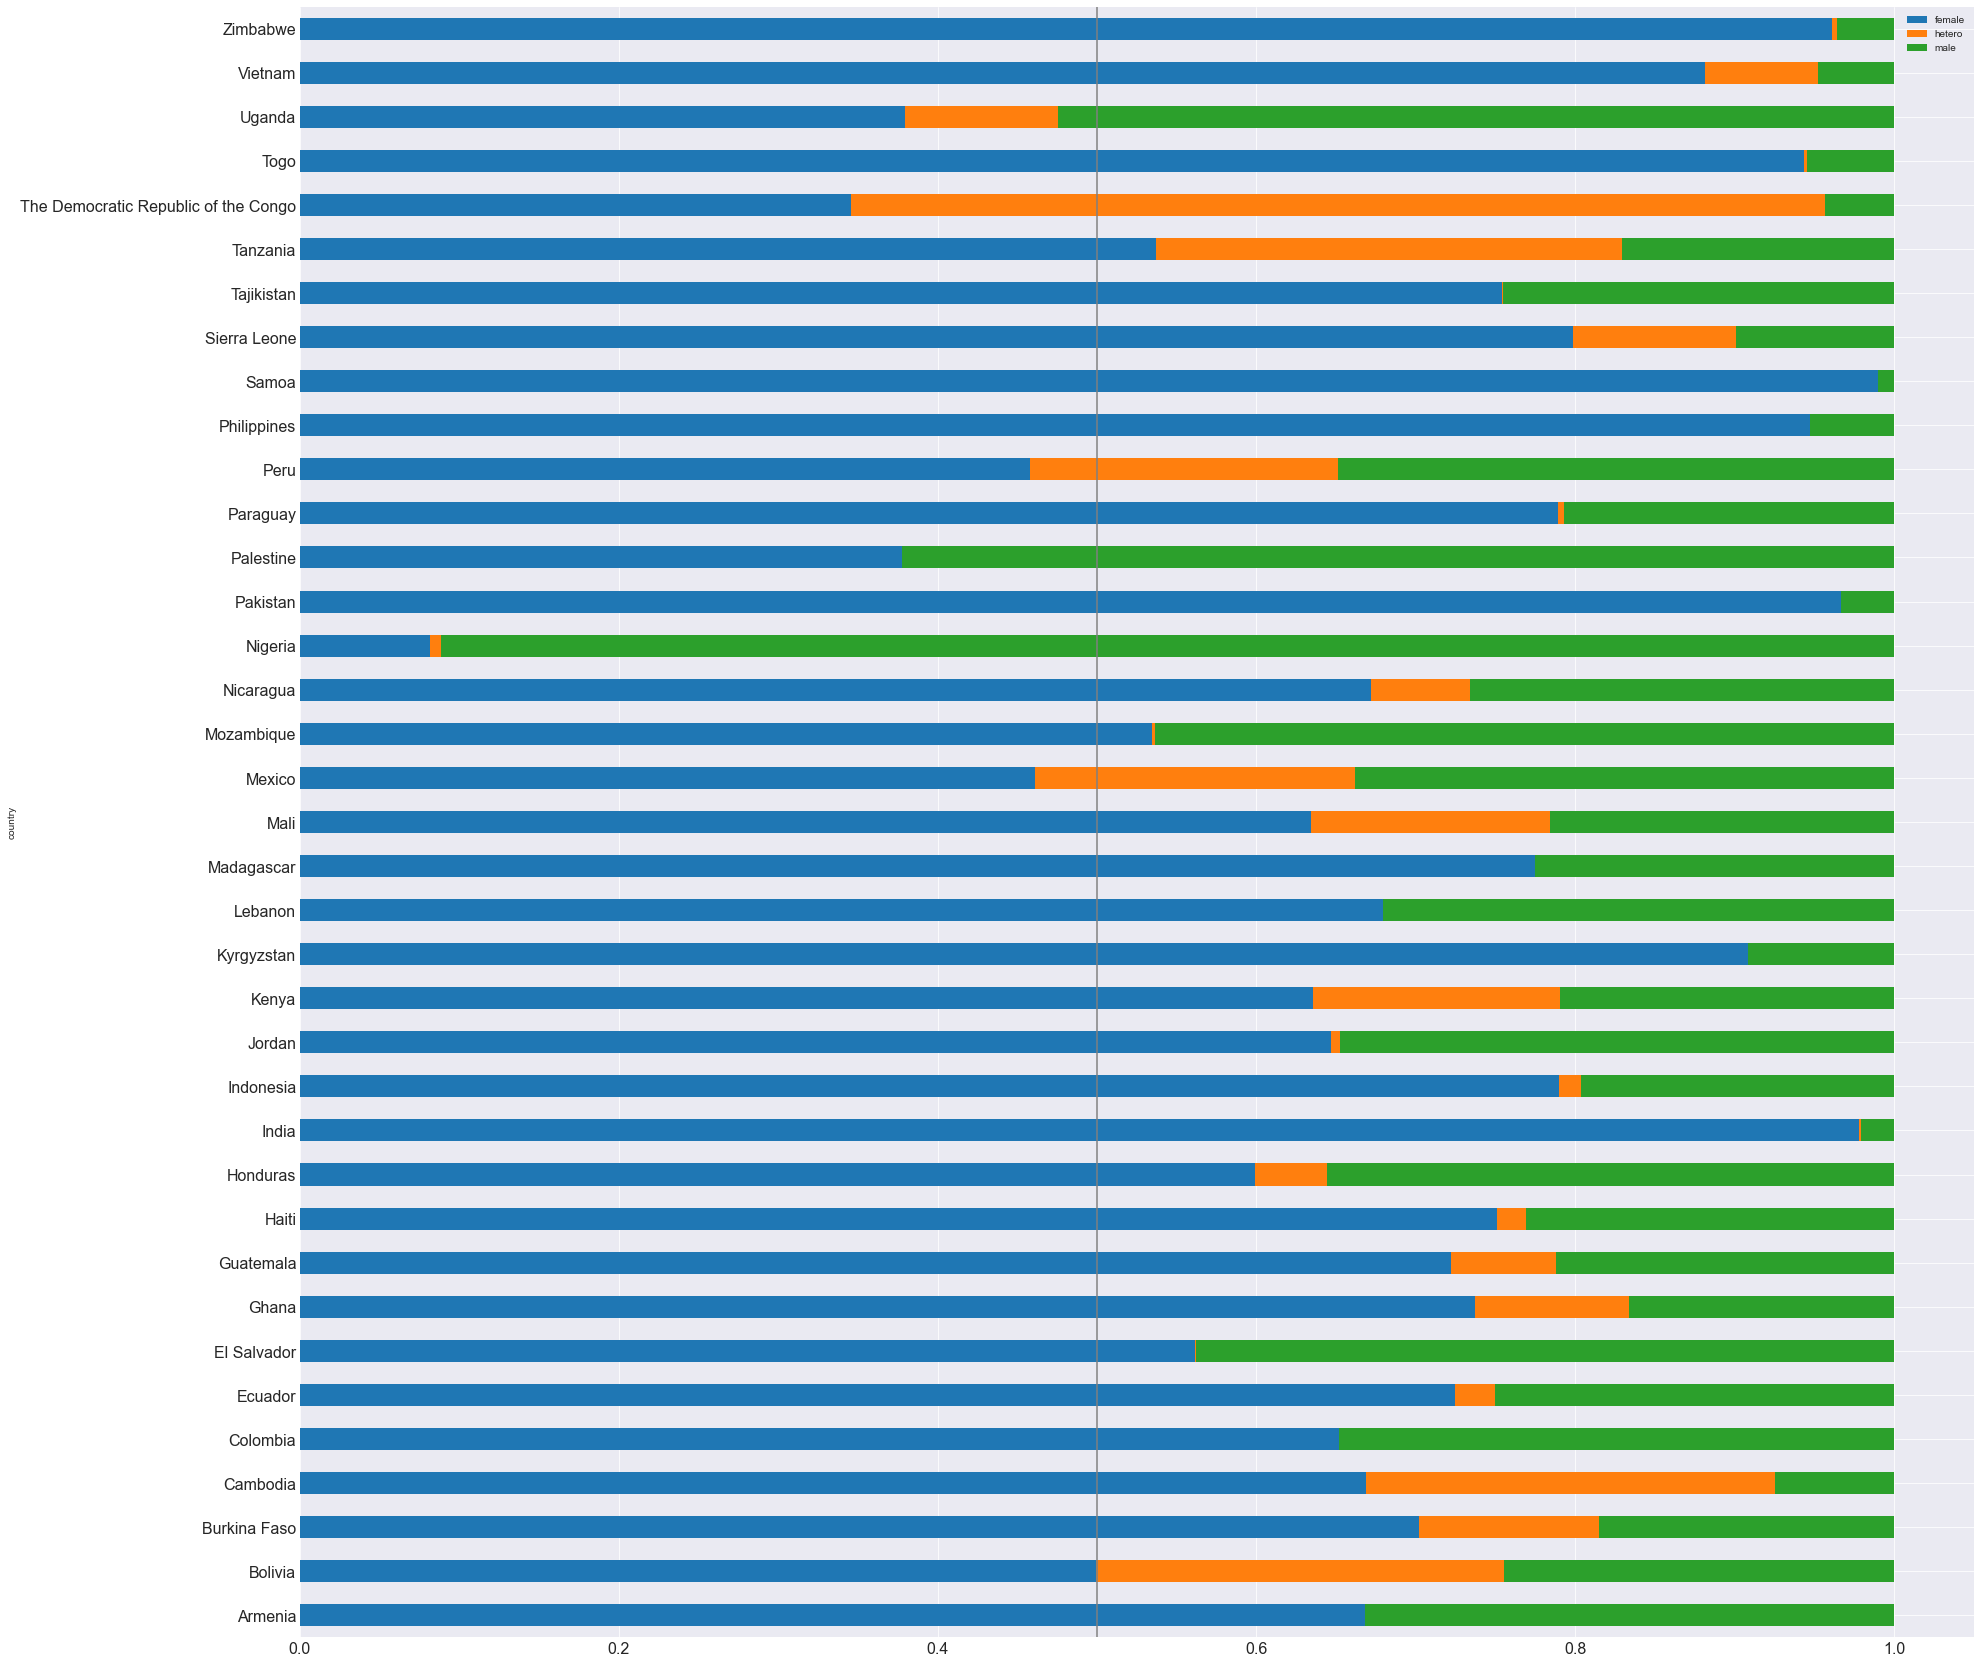

In [50]:
ax = country_gender.div(country_gender.sum(axis=1), axis=0).plot.barh(
    stacked=True, 
    figsize=(30, 30),
    fontsize=16,
)
ax.legend(loc=0)
ax.axvline(x=0.5, ls='-', lw=1.5, c='gray')

In [51]:
country_gender.query('male > female')

borrowers_consistency,female,hetero,male
country,,,
Nigeria,485.0,41.0,5407.0
Palestine,2333.0,0.0,3845.0
Uganda,4907.0,1239.0,6786.0


Похоже, что мужчины активно пользуются Kavi только в трех странах: Нигерии, Палестине и Уганде. Причем в Нигерии перевес на два порядка. Если верть [википедии](https://en.wikipedia.org/wiki/Women_in_Nigeria), то понятно, почему это так. Там до сих пор не защищены базовые прова человека для женщин, что грустно.
    
В Республиуке Конго преобладают групповые займы. Можно посмотреть на их структуру.

In [52]:
loans.query('ISO == "COD" and borrowers_number > 1')[['females', 'males']].mean()

females    12.884233
males       1.773218
dtype: float64

Интересно посмотреть на структуру займов этих стран.
В Конго все равно очень сильно преобладание женщин, и подавляющая часть (да почти все) займов являются групповыми. Можно предположить, что MPI в COD очень высокий, что не позволяет людям выплачивать займы самостоятельно, а толуо по группам. 

In [53]:
loans.pivot_table(
    index='country',
    values='MPI'
).sort_values('MPI', ascending=False)

,MPI
country,
Burkina Faso,0.547692
Sierra Leone,0.481071
Mali,0.444833
The Democratic Republic of the Congo,0.395636
Madagascar,0.390182
Uganda,0.375300
Mozambique,0.347364
Haiti,0.293800
Togo,0.272333


MPI в COD действительно довольно высокий, но в странах с более высоким индексом MPI наблюдается инок поведение заемщиков. Можно посмотреть на цели займов в этих регионах, возможно в Конго люди берут займы для бизнеса, в то время, как в других странах с большим MPI на удовлетворение базовых потребностей.

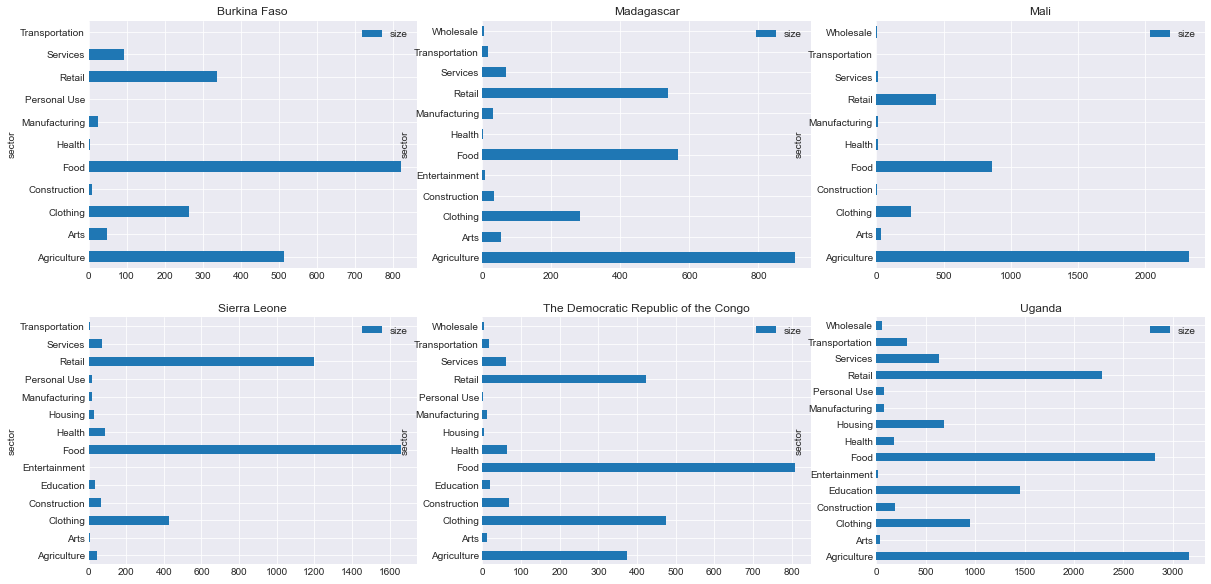

In [54]:
poor = loans.query('MPI > .35')
poor_sector_size = poor.pivot_table(
    index=['country', 'sector'], 
    aggfunc='size'
).reset_index().rename({0: 'size'}, axis=1).groupby(['country'])
# poor_sector_size
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for ax, (name, group) in zip(axs.flat, poor_sector_size):
    ax.set_title(name)
#     ax.set_xlabel(group.sector, fontsize=14)
    group.plot.barh(x='sector', y='size', ax=ax)


Нет, структура займов тоже не объясняет такое количество групповых займов. Возможно дело в сумме займа.

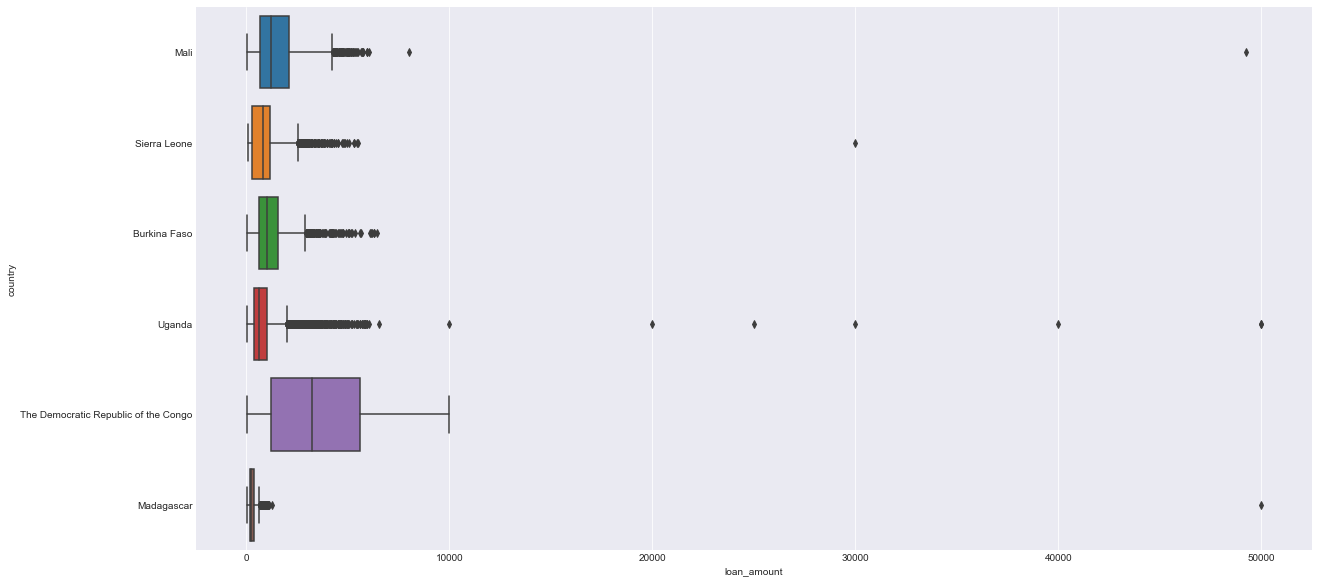

In [55]:
plt.figure(figsize=(20, 10))
sns.boxplot(y='country', x='loan_amount', data=poor[['country', 'loan_amount']])

Похоже, мы на верном пути :) Интересно, что там в разрезе по секторам.

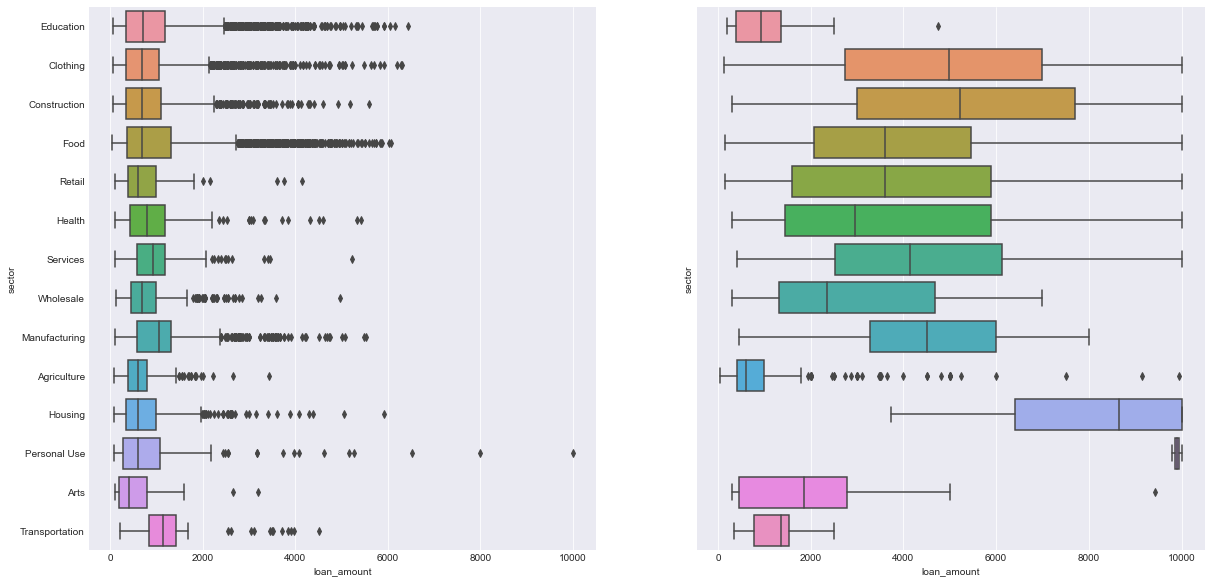

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
yticks = sorted(poor.sector.unique())
sns.boxplot(y='sector', x='loan_amount', data=poor.query('ISO != "COD" and loan_amount <= 10000'), ax=axs[0])
sns.boxplot(y='sector', x='loan_amount', data=poor.query('ISO == "COD"'), ax=axs[1])

По всем секторам сумма займов в Демократической Республике Конго выше, чем в странах с аналогичным MPI. Благодаря тому, что в COD большинство займов групповые, сумма займа в COD раза в три выше, чем в других страннах из рассамтриваемой группы. 

Какой-то подозрительный займ в 10000\$ в секторе персонального пользования.

In [57]:
poor.query('ISO == "COD" and sector == "Personal Use"')

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,borrower_genders,repayment_interval,date,ISO,world_region,MPI,females,males,borrowers_number,borrowers_consistency
61983,794905,9800.0,9800.0,Personal Expenses,Personal Use,to renovate his house,CD,The Democratic Republic of the Congo,"Bukavu, Sud Kivu Provice",USD,...,"male, female, male, male, male, male, female, ...",monthly,2014-11-06,COD,Sub-Saharan Africa,0.395636,3,11,14,hetero
62058,794609,10000.0,10000.0,Personal Expenses,Personal Use,to renovate her house.,CD,The Democratic Republic of the Congo,"Bukavu, Sud Kivu Provice",USD,...,"male, male, male, female, female, male, male, ...",monthly,2014-11-06,COD,Sub-Saharan Africa,0.395636,3,12,15,hetero


## Займы с большими суммами

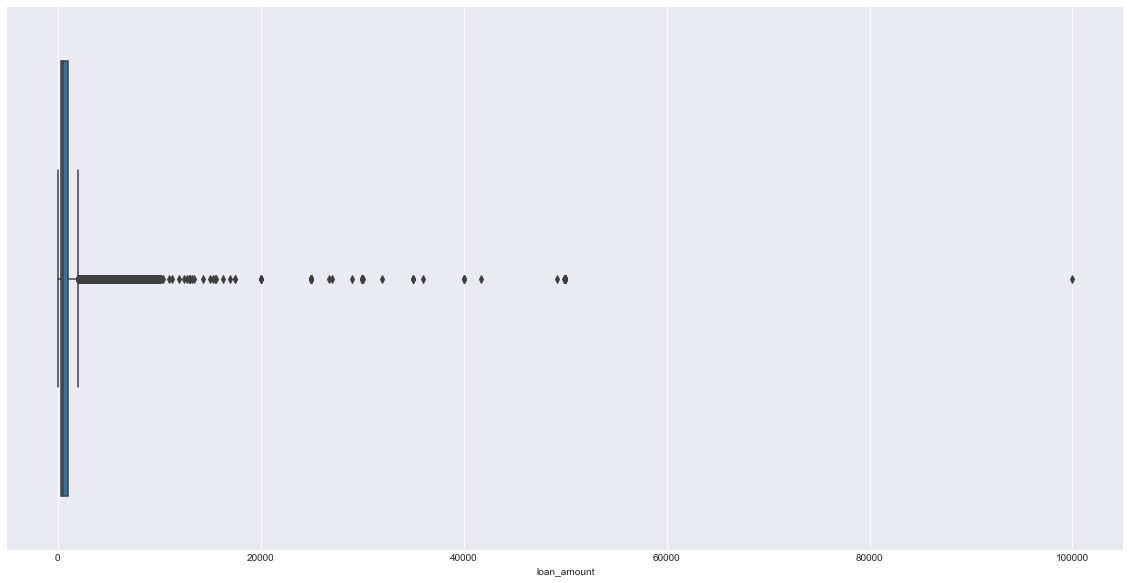

In [58]:
plt.figure(figsize=(20,10))
sns.boxplot(loans.loan_amount)

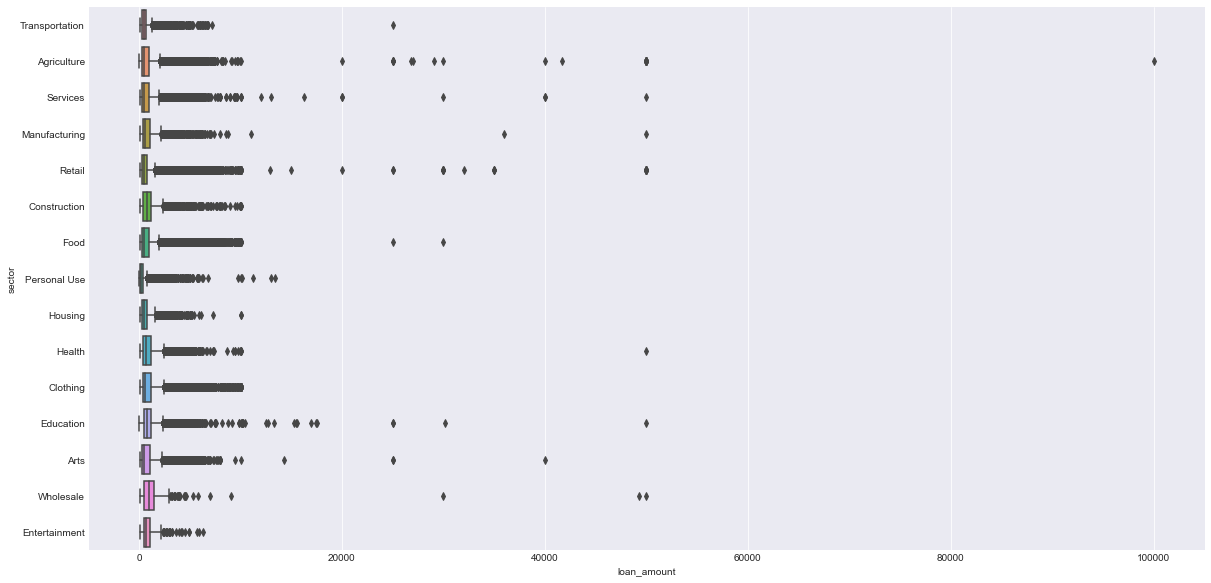

In [59]:
plt.figure(figsize=(20,10))
sns.boxplot(y='sector', x='loan_amount', data=loans)

Будем считать займ большим, если сумма превышает 10 000$

In [60]:
big_loans = loans.query('loan_amount > 10000')

In [61]:
big_loans[['loan_amount', 'activity', 'sector', 'use', 'borrowers_consistency', 'borrowers_number']]

,loan_amount,activity,sector,use,borrowers_consistency,borrowers_number
3564,12925.0,Renewable Energy Products,Retail,to buy and sell Barefoot Power's solar products,male,1
12667,10150.0,Home Energy,Personal Use,to connect to the solar micro-grid installed i...,hetero,4
13929,50000.0,Renewable Energy Products,Retail,to buy and sell Barefoot Power's Solar Lightin...,male,1
17963,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power's solar lightin...,male,1
21953,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power solar lighting.,female,1
...,...,...,...,...,...,...
378087,30000.0,Renewable Energy Products,Retail,to purchase solar lanterns and solar home syst...,male,1
378475,30000.0,Agriculture,Agriculture,increase smallholder farmers’ incomes by buyin...,male,1
384686,14300.0,Textiles,Arts,"to increase production of fair-wage, ecologica...",male,1
393334,25000.0,Food,Food,to increase the company's production capacity ...,female,1


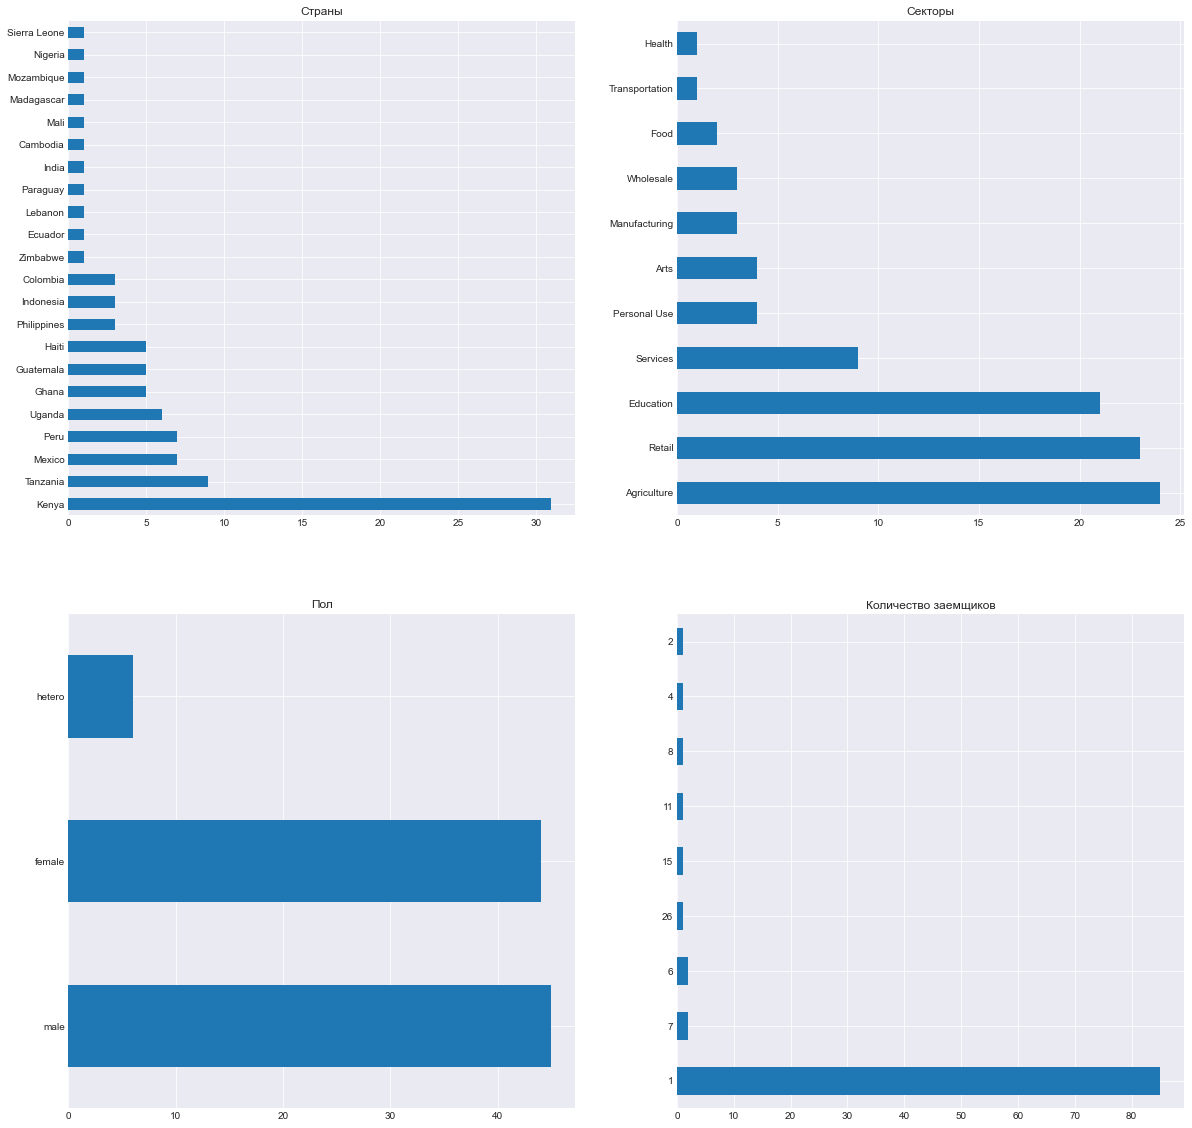

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
big_loans.country.value_counts().plot.barh(ax=axs[0, 0], title='Страны')
big_loans.sector.value_counts().plot.barh(ax=axs[0, 1], title='Секторы')
big_loans.borrowers_consistency.value_counts().plot.barh(ax=axs[1, 0], title='Пол')
big_loans.borrowers_number.value_counts().plot.barh(ax=axs[1, 1], title='Количество заемщиков')

Основными крупными странами-заемщиками являются Уганда, Перу, Мехико, Танзания и Кения, являющаяся лидеором по колочеству крупных займов. По большей части крупные займы направлены на развитие образования, торговли и аграрного сектора.

Большие займы берут, как группы лиц, так единоличный заемщик (вероятно крупный предприниматель).

### Страна, пол заемщика и сумма заявки

In [63]:
casual_loans = loans.query('loan_amount <= 10000')

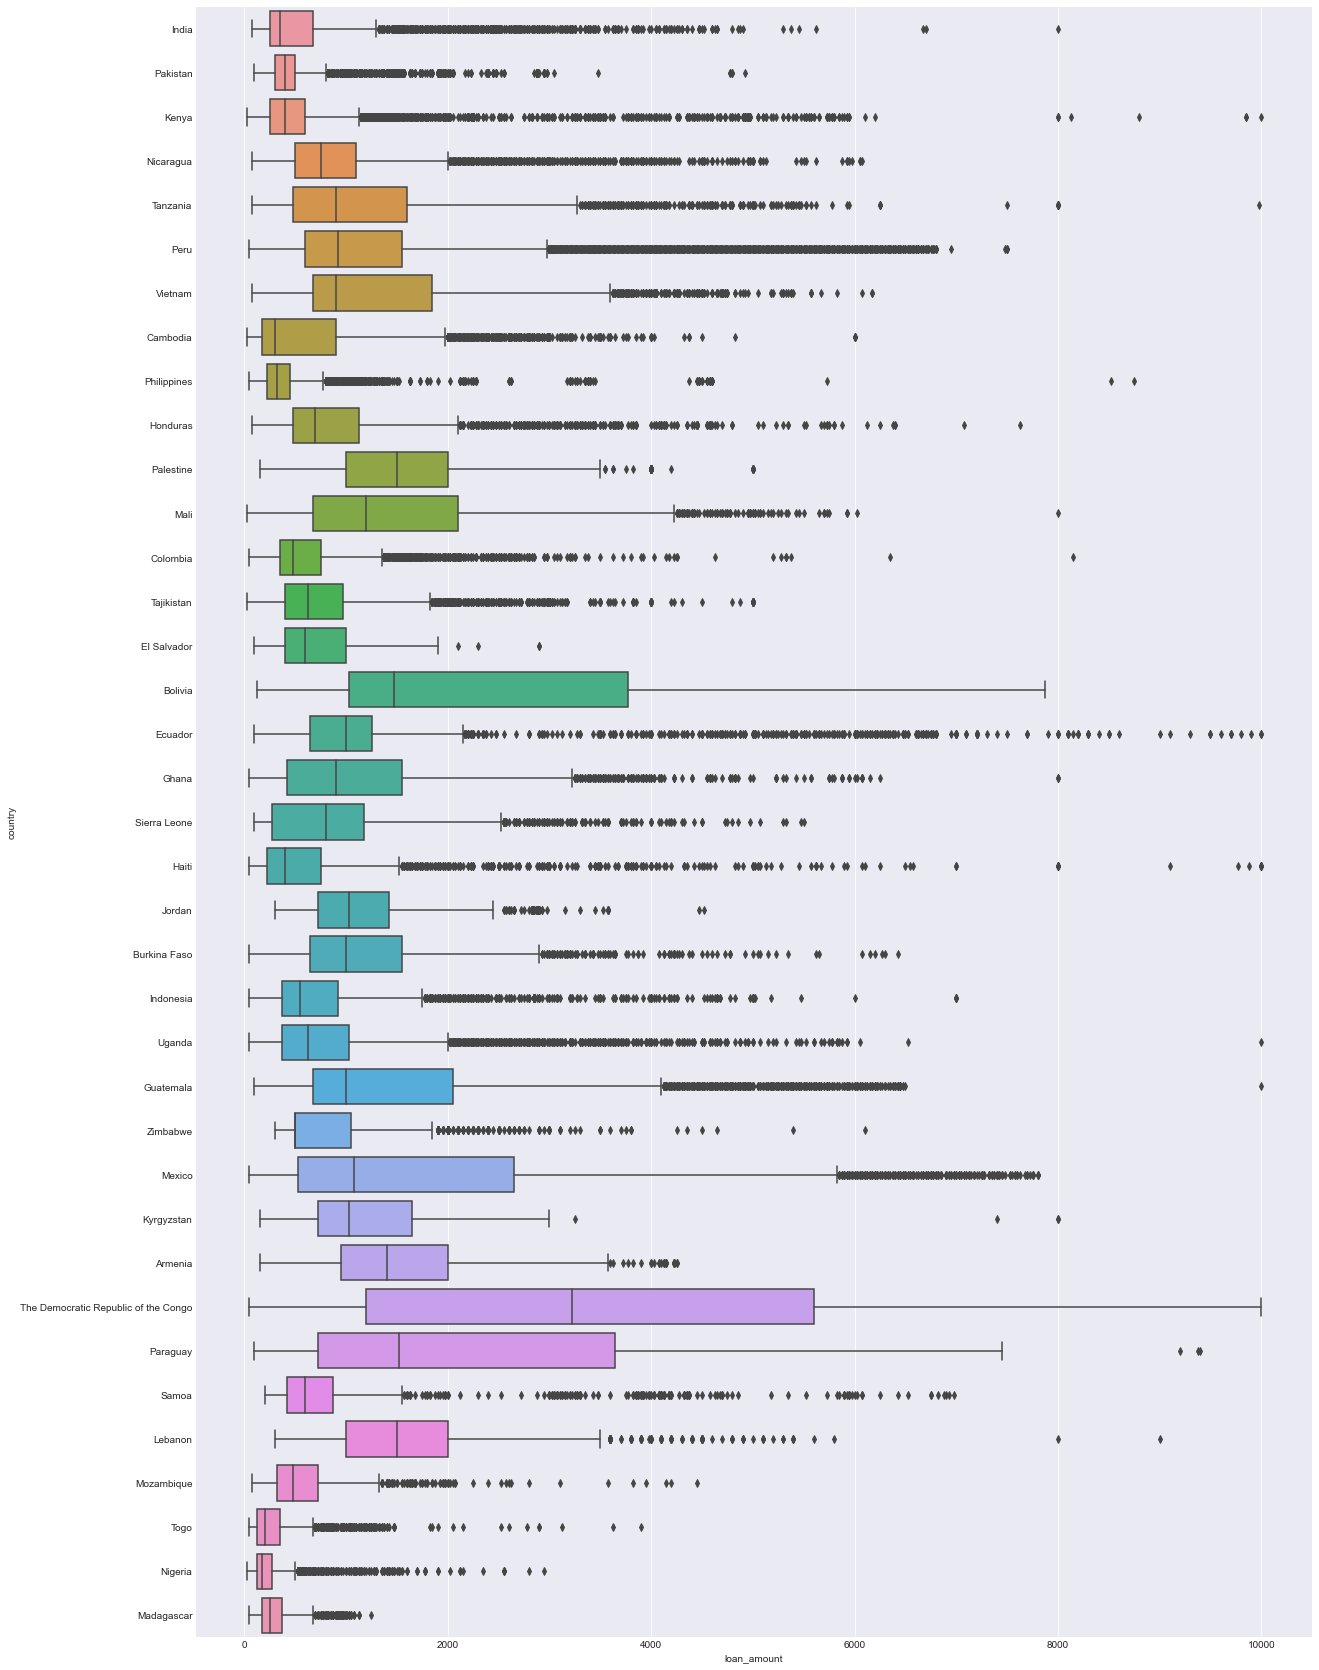

In [64]:
plt.figure(figsize=(20, 30))
sns.boxplot(x='loan_amount', y='country', data=casual_loans)

### Влияние MPI страны на суммы займа
<a id="mpi_loan"></a>

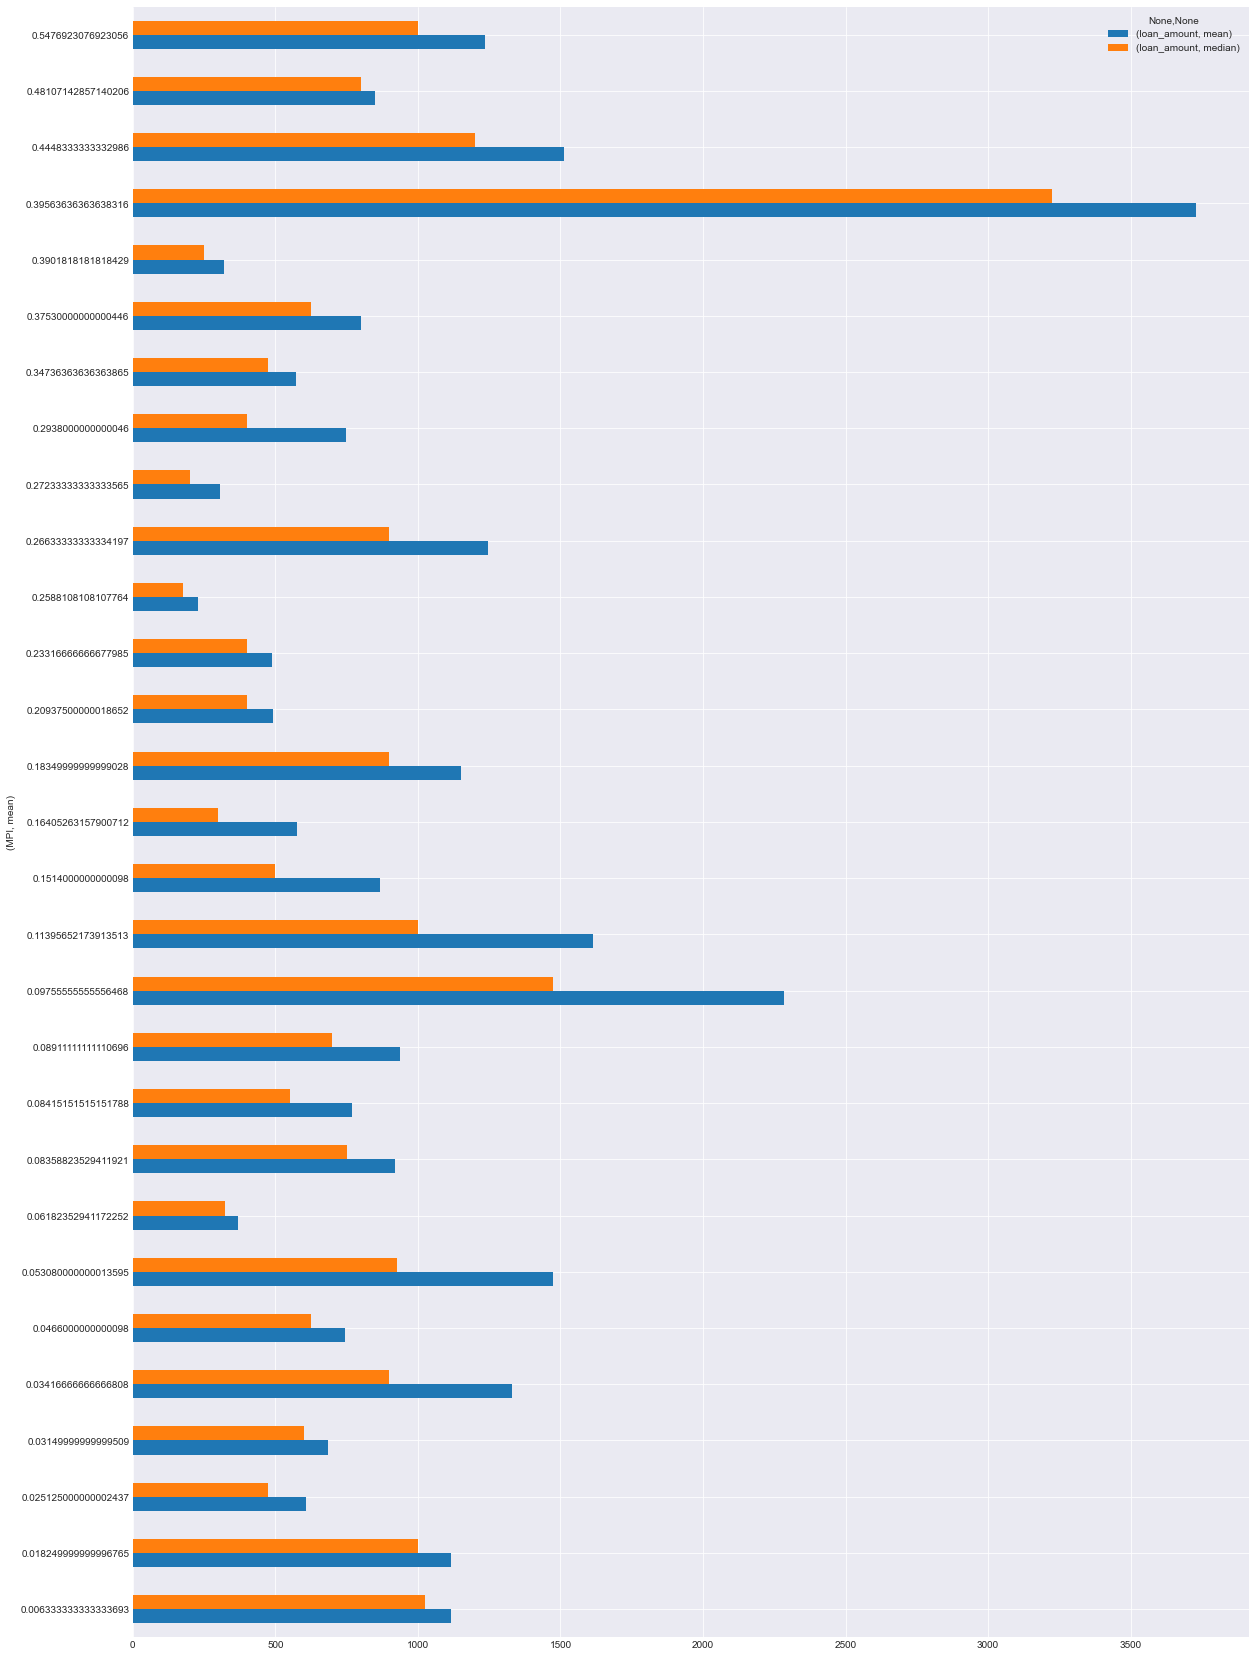

In [65]:
casual_loans.pivot_table(
    index='country',
    aggfunc={'loan_amount': ['mean', 'median'], 'MPI': 'mean'}
).sort_values(('MPI', 'mean')).dropna().plot.barh(x=('MPI', 'mean'), figsize=(20, 30))

Кажется, что MPI особо на размеры займа не влияет.

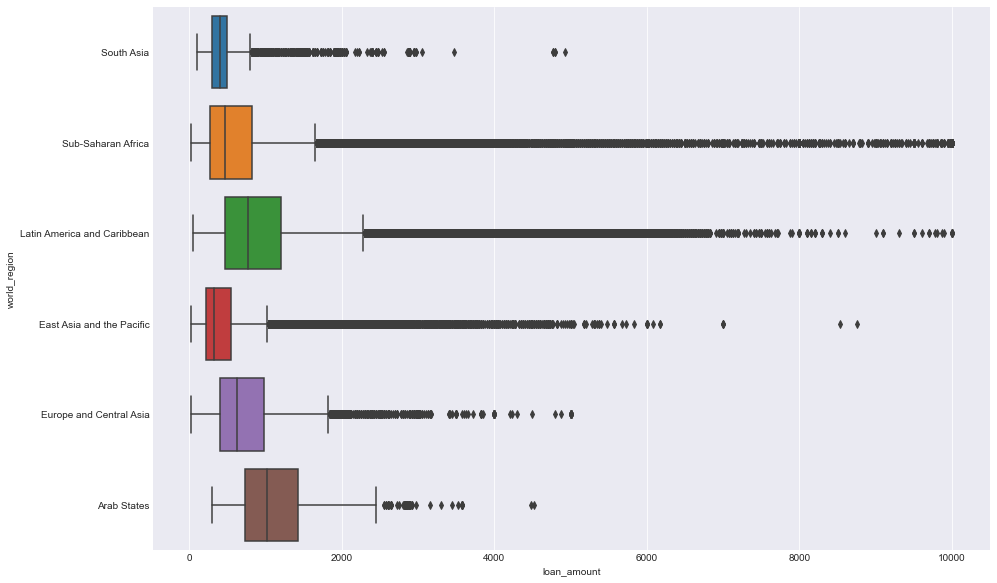

In [66]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='loan_amount', y='world_region', data=casual_loans)

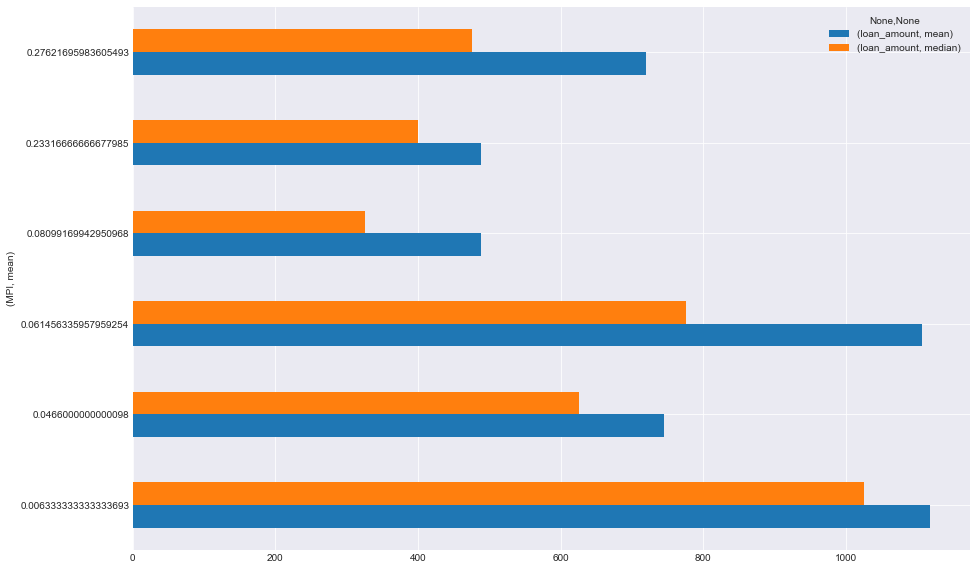

In [67]:
casual_loans.pivot_table(
    index='world_region',
    aggfunc={'loan_amount': ['mean', 'median'], 'MPI': 'mean'}
).sort_values(('MPI', 'mean')).dropna().plot.barh(x=('MPI', 'mean'), figsize=(15, 10))

В разрезе по регионам просматривается некоторая скачкообразная зависимость от MPI. Для более надежных выводов недостает данных. Мало частей света 😅

Несмотря на самое маленькое количество займов в Арабских странах, размеры займов там больше, чем в других регионах.

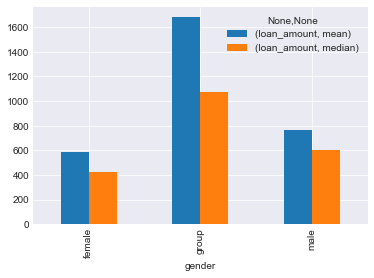

In [68]:
loans.assign(gender=lambda x: x.borrowers_consistency.where(x.borrowers_number == 1, 'group')).pivot_table(
    index='gender',
    aggfunc={'loan_amount': ['mean', 'median']}
).plot.bar()


Мужчины бурут займы на большую сумму, чем женщины, а группы лиц — на большую сумму, чем мужчины.

# Домашка

Расширьте наш отчёт исследованием следующих вопросов:
1. Зависимость пола заёмщика от региона планеты, сектора экономики.
1. Влияние такого атрибута займа, как Количество кредиторов (lender_count), на суммы и сроки займов.
1. Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
1. Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе макрорегионов.

## Зависимость пола заёмщика от региона планеты, сектора экономики.

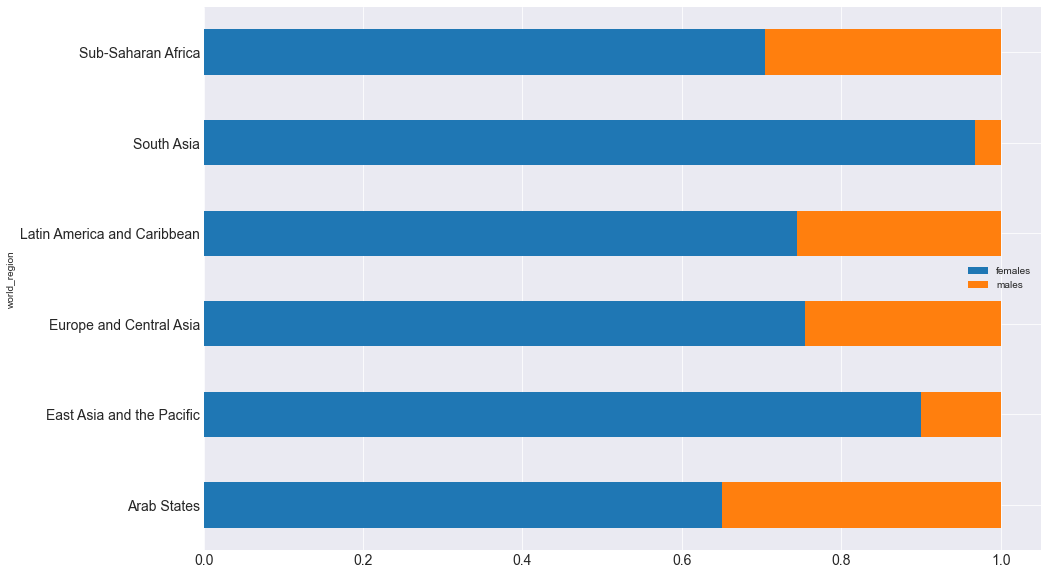

In [69]:
loans.pivot_table(
    index='world_region',
    aggfunc={'females': 'sum', 'males': 'sum'}
).eval(
    '''all = (females + males)
       females = females / all
       males = males / all'''
).drop('all', axis=1).plot.barh(stacked=True, figsize=(15, 10), fontsize=14)

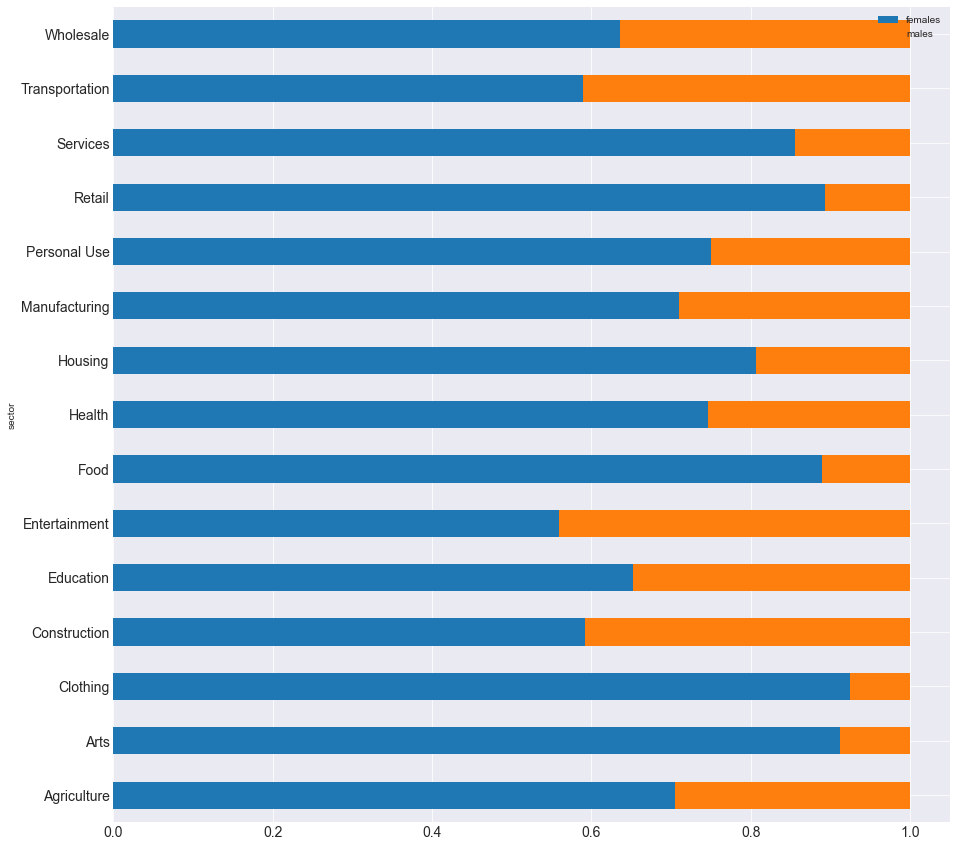

In [70]:
loans.pivot_table(
    index='sector',
    aggfunc={'females': 'sum', 'males': 'sum'}
).eval(
    '''all = (females + males)
       females = females / all
       males = males / all'''
).drop('all', axis=1).plot.barh(stacked=True, figsize=(15, 15), fontsize=14)

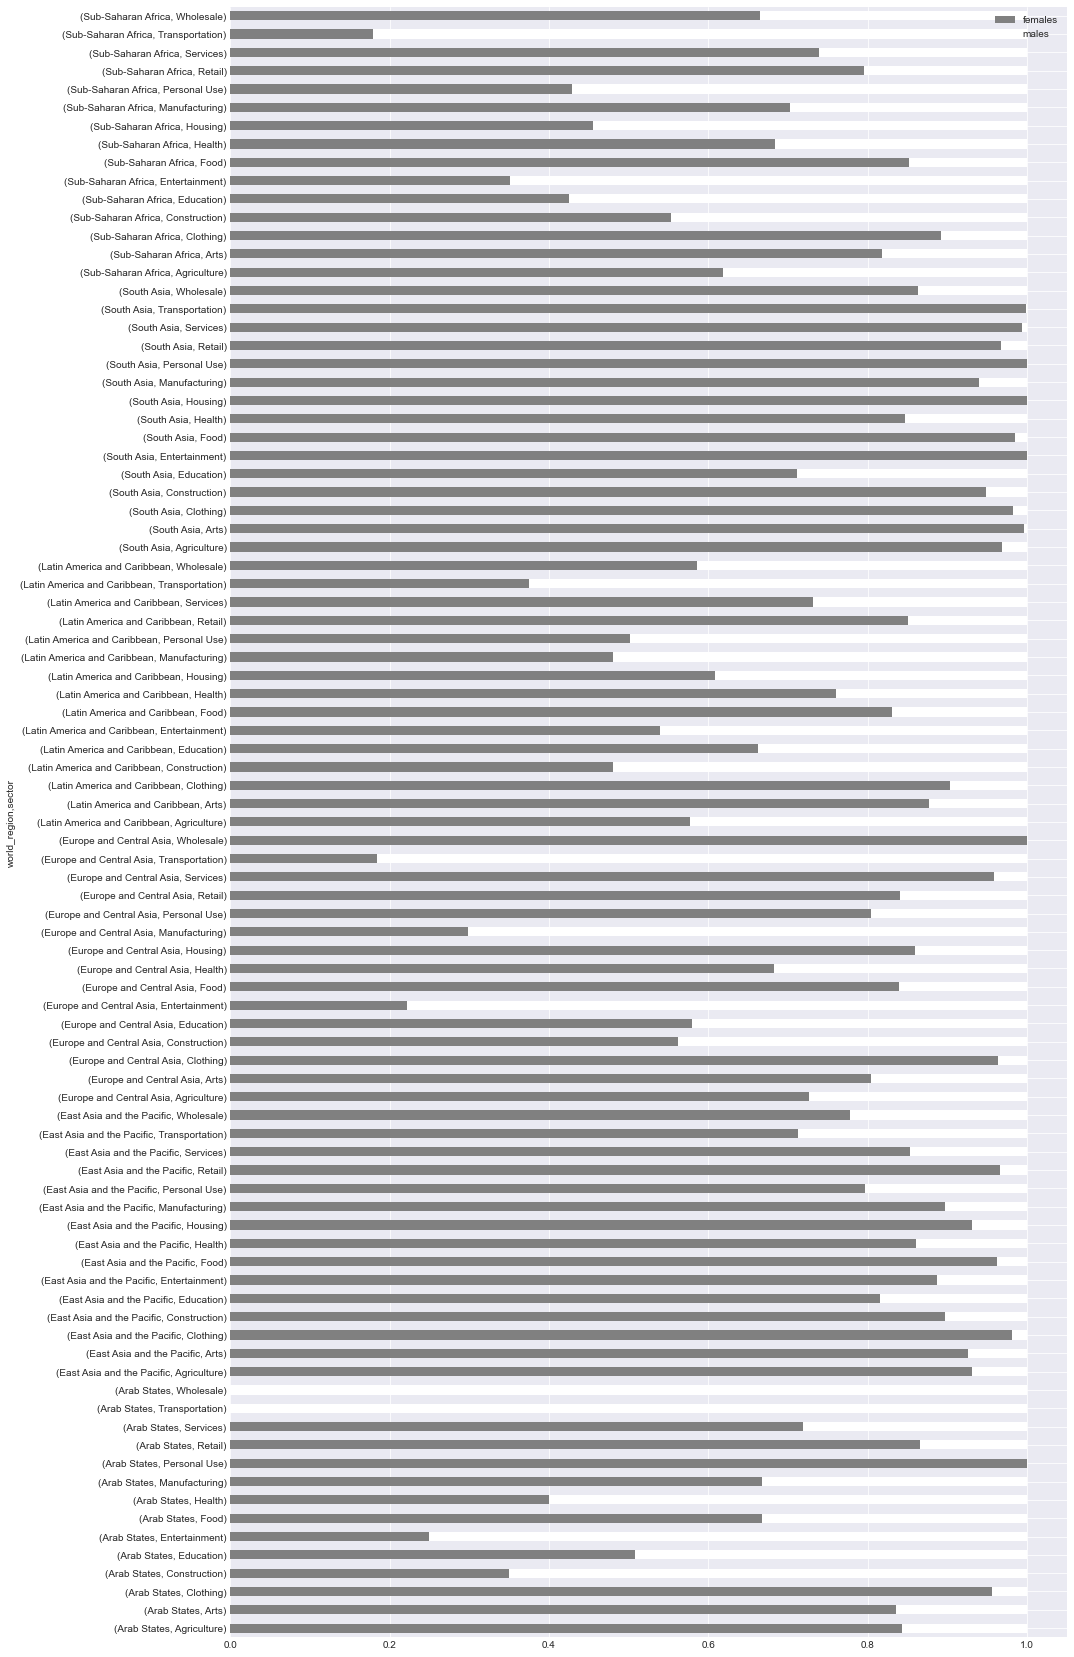

In [71]:
loans.pivot_table(
    index=['world_region', 'sector'],
    aggfunc={'females': 'sum', 'males': 'sum'}
).eval(
    '''all = (females + males)
       females = females / all
       males = males / all'''
).drop('all', axis=1).plot.barh(stacked=True, figsize=(15, 30), fontsize=10, color=['grey', 'white'])

Text(0.5, 1.0, 'Процент мужчин в секторе экономике по стране')

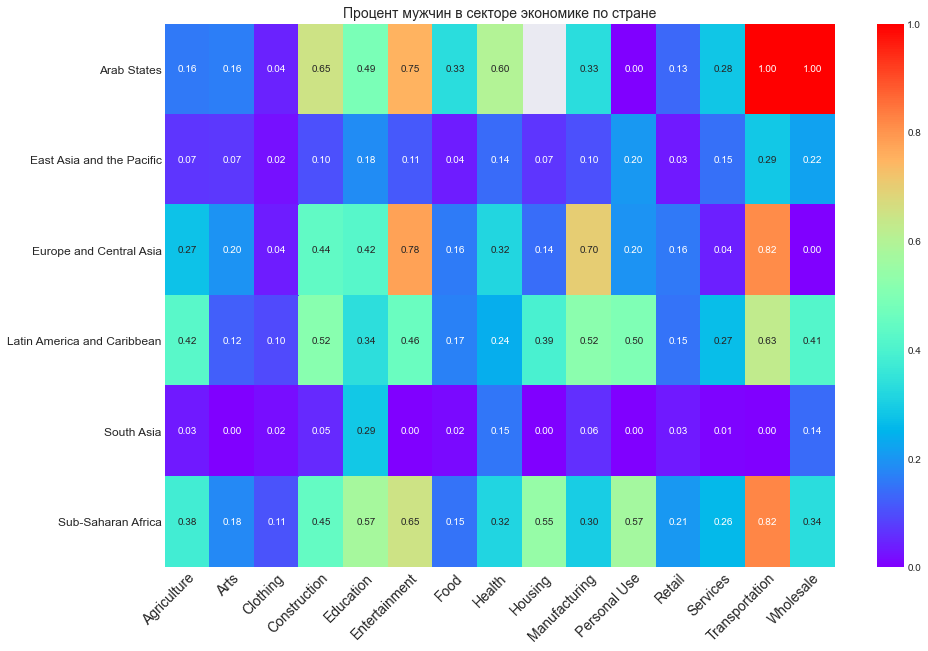

In [72]:
# gcs stands for gender country sector
gcs = (
    loans.pivot_table(
        index=['sector', 'world_region'],
    #     columns='world_region',
        aggfunc={'males': 'sum', 'borrowers_number': 'sum'}
    )
    .eval('males = males / borrowers_number')
    .drop('borrowers_number', axis=1)
    .unstack(0)
    .droplevel(0, axis=1)
)

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gcs, ax=ax, annot=True, fmt='.2f', cmap='rainbow')
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode="anchor", ha='right', fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=12)
ax.set_title('Процент мужчин в секторе экономике по стране', fontsize=14)

In [73]:
pd.DataFrame(gcs.stack(), columns=['males_percent']).query('males_percent > .6').unstack(1)

males_percent                               \
sector                       Construction Entertainment Transportation   
world_region                                                             
Arab States                          0.65      0.750000       1.000000   
Europe and Central Asia               NaN      0.777778       0.815668   
Latin America and Caribbean           NaN           NaN       0.625061   
Sub-Saharan Africa                    NaN      0.648936       0.821232   

                                                     
sector                      Wholesale Manufacturing  
world_region                                         
Arab States                       1.0           NaN  
Europe and Central Asia           NaN      0.701754  
Latin America and Caribbean       NaN           NaN  
Sub-Saharan Africa                NaN           NaN

Почти по всем странам и секторам женский пол преобладает как заемщик, однако в некоторых странах есть секторы с сильным мужским перевесом. 

## Влияние количества кредиторов (lender_count), на суммы и сроки займов.

In [74]:
loans[['lender_count']].describe()

,lender_count
count,397584.000000
mean,22.131587
std,28.092798
min,1.000000
25%,8.000000
50%,15.000000
75%,27.000000
max,2986.000000


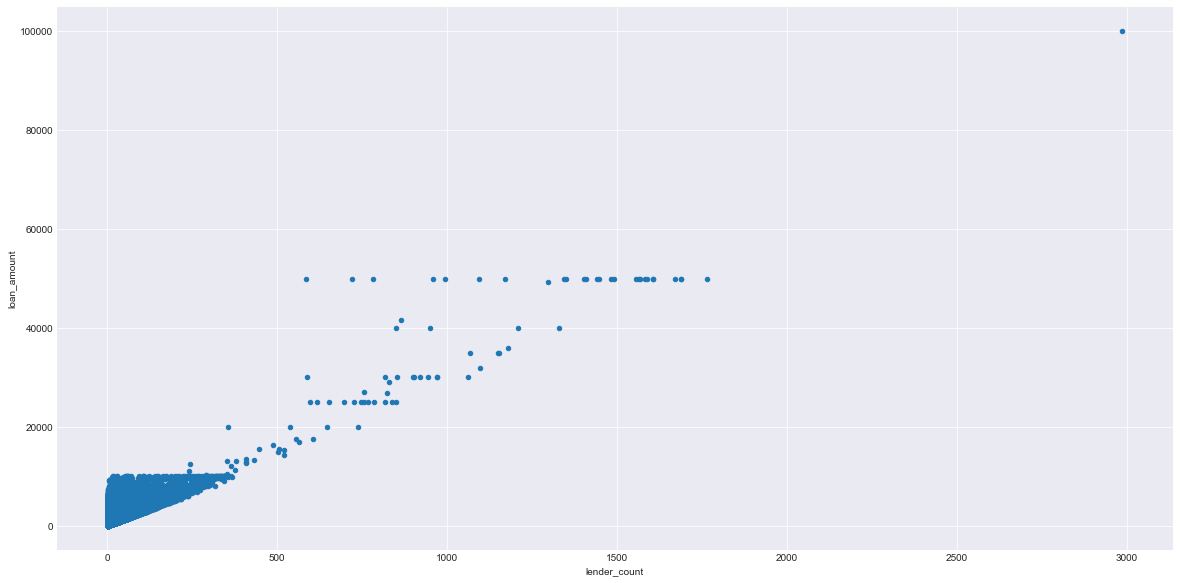

In [75]:
loans.plot.scatter(x='lender_count', y='loan_amount', figsize=(20, 10))

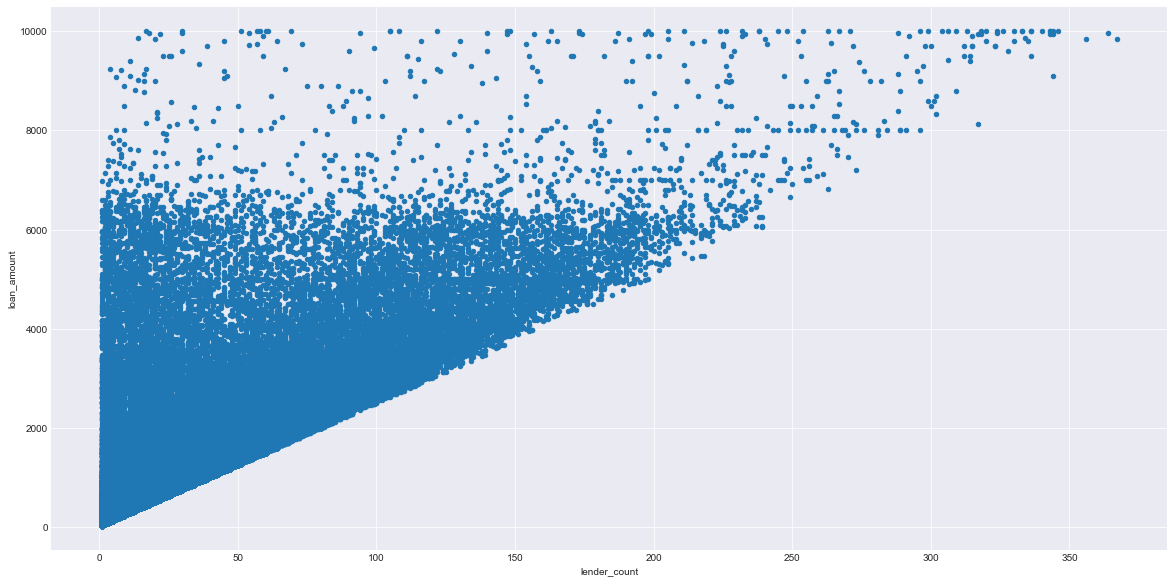

In [76]:
casual_loans.plot.scatter(x='lender_count', y='loan_amount', figsize=(20, 10))

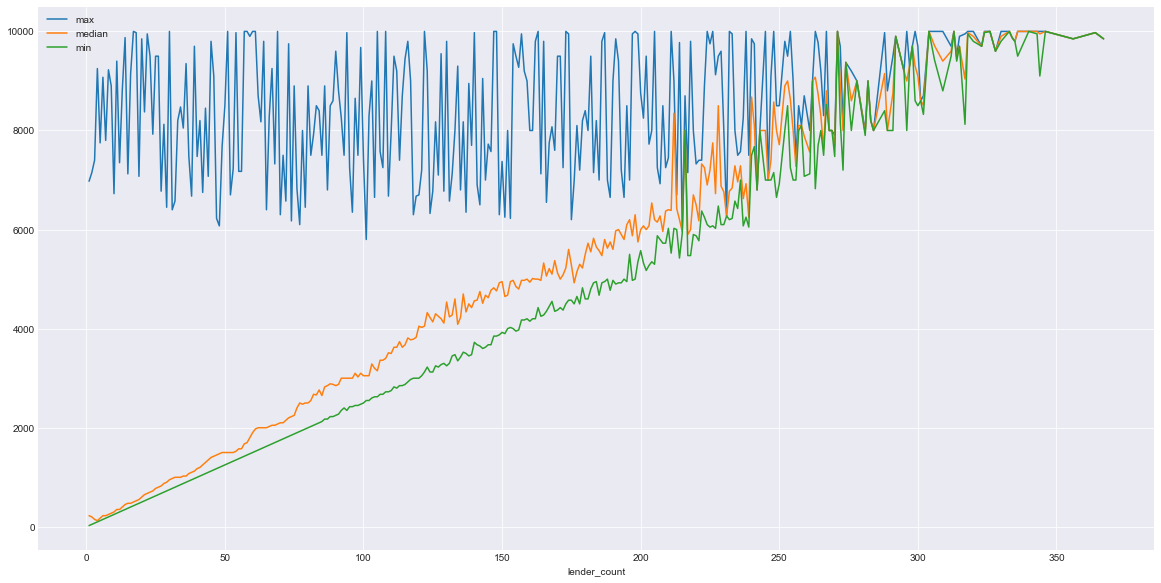

In [77]:
casual_loans.pivot_table(
    index='lender_count',
    aggfunc={'loan_amount': ['median', 'min', 'max']}
).droplevel(0, axis=1).plot.line(figsize=(20, 10))

Картина зависимости суммы займа от количества кредиторов представляется следующая:

С увеличением количества инвесторов растет минимальная сумма займа, выданная группой; при этом, расрпределение сумм займов у всех групп похожа, если не считать разницы минимума мимнимума, то есть маленькая группа вполне может выдать займ того же размера, что и большая группа. Для групп с количеством инвесторов <= 360 существует потолок примерно на отметке в 6000. 

Очень похожая картина намечается для групп с количеством инвесторов больше 500, но меньше 1700. Думаю, что, если бы данных было больше, то в данной области образовался бы еще один треугольник. Увы, наверняка сказаь нельзя.

Такое распределение может свидетельствовать о существовании кластера сильных кредиторов, которые по платежеспособности могут тягаться с группой более мелких кредиторов.

## Влияние показателя MPI в разных странах на суммы займов и сроки погашения.

Зависимость суммы от MPI была рассмотрена [выше](#mpi_loan)

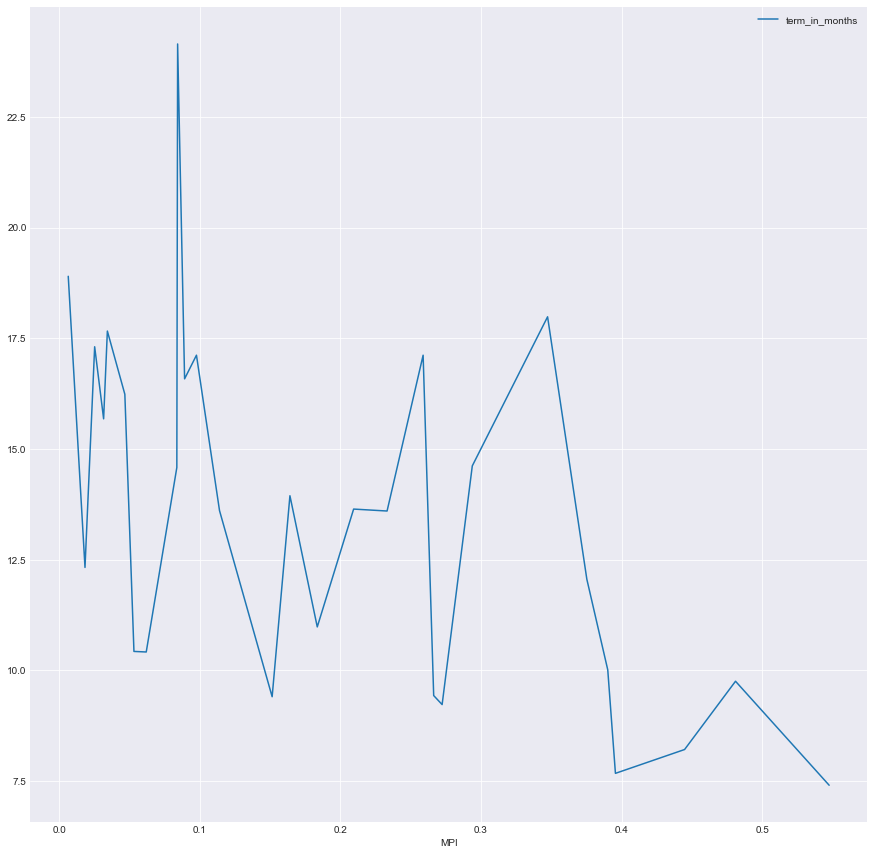

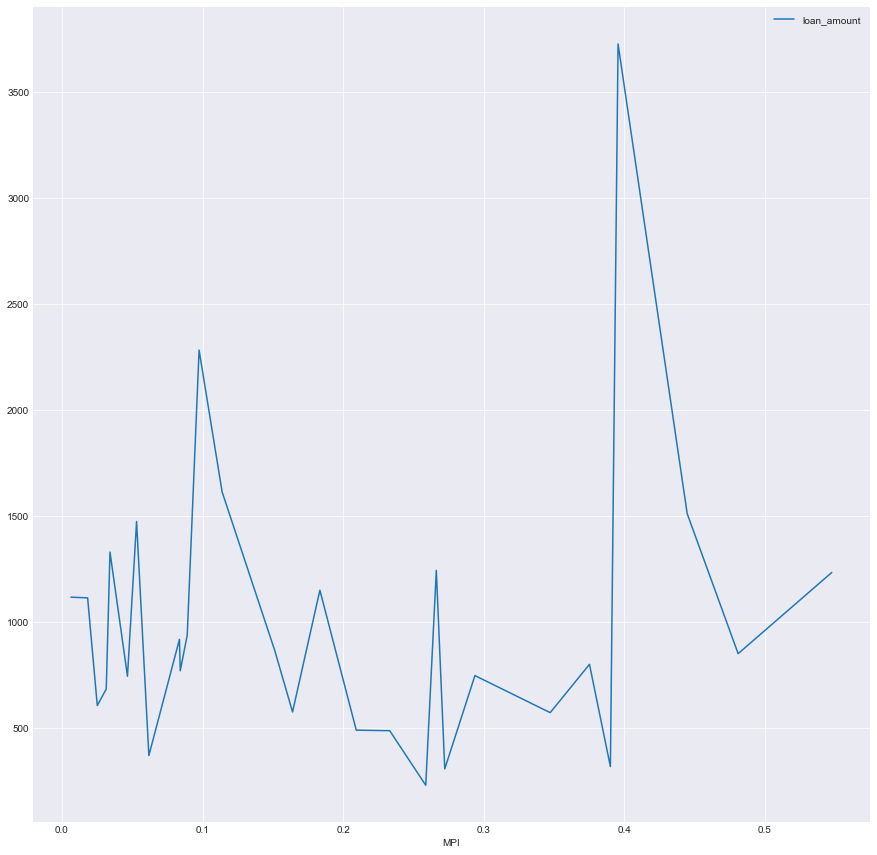

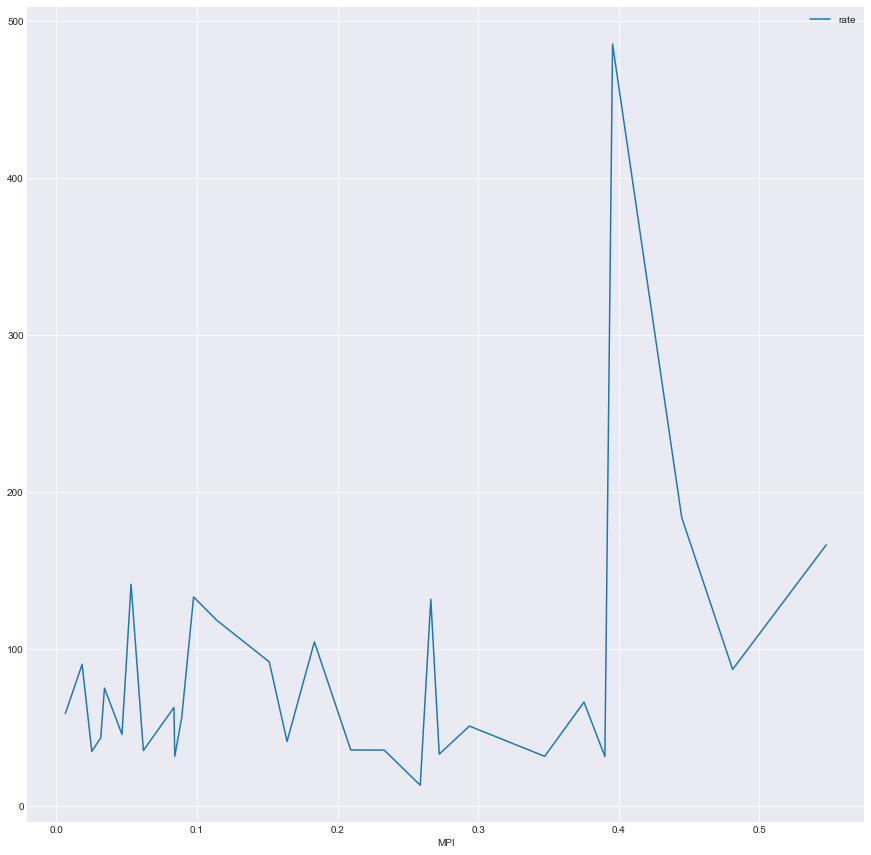

In [78]:
mpi_loans = casual_loans.pivot_table(
    index='country',
    aggfunc={'MPI': 'mean', 'loan_amount': 'mean', 'term_in_months': 'mean'}
).dropna().sort_values('MPI').eval('rate = loan_amount / term_in_months')

mpi_loans.plot(x='MPI', y='term_in_months', figsize=(15, 15))
mpi_loans.plot(x='MPI', y='loan_amount', figsize=(15, 15))
mpi_loans.plot(x='MPI', y='rate', figsize=(15, 15))

На мой взгляд какой-то хорошо прослеживаемой зависимости нет, ни по сроку погашения, ни по скорости погашения. По первому графику может показаться, что страны с меньшим индексом будности старабтся брать кредит на больший срок (видимо, доверие кредиторов позволяет), однако большие сроки займов присутствуют и в странах с высоким уровнем бедности.

## Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе макрорегионов.

In [79]:
casual_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'ISO', 'world_region', 'MPI', 'females', 'males',
       'borrowers_number', 'borrowers_consistency'],
      dtype='object')

In [139]:
from datetime import timedelta

timed_casual_loans = (
    casual_loans
    .assign(
        disbursed_time=lambda x: pd.to_datetime(x.disbursed_time, errors='coerce'),
        posted_time=lambda x: pd.to_datetime(x.posted_time, errors='coerce'),
        monthly_payment=lambda x: x.loan_amount / x.term_in_months
    )
    .eval('time_to_fund = disbursed_time - posted_time')
    .dropna()
)
timed_casual_loans = timed_casual_loans[timed_casual_loans.time_to_fund > timedelta(seconds=0)]

timed_casual_loans_s = timed_casual_loans.groupby('world_region').agg({
    'loan_amount': 'mean',
    'term_in_months': 'mean',
    'time_to_fund': pd.Series.mean,  # Work around this bug https://github.com/pandas-dev/pandas/issues/17382
    'monthly_payment': 'mean'
}).sort_values('loan_amount')
timed_casual_loans_s

,loan_amount,term_in_months,time_to_fund,monthly_payment
world_region,,,,
Sub-Saharan Africa,578.081700,14.506117,25 days 03:52:33.452627,51.633986
Europe and Central Asia,625.619835,14.264463,10 days 07:22:03.066115,44.484399
East Asia and the Pacific,1158.400901,18.090090,17 days 11:18:04.280180,94.999260
South Asia,1235.576923,13.500000,9 days 14:50:37.769230,94.674076
Latin America and Caribbean,1324.912638,23.778101,28 days 14:49:05.488060,87.601871
Arab States,2045.454545,29.666667,45 days 18:05:02.060606,64.960250


Судя по данным, Южная Азия — оличный заемщик, так как быстро выплачивает займ, и занимает второе место по платежеспособности. Решиние по данному региону принимается в разы быстрее, чем по другим.

Восточная Азия и Океания тоже выглядит привлекательной для кредиторов из-за платежеспособности, однако кредит берется на более длительный срок и регения по финанстированию принимается дольше.

Самые большие займы — в Арабских странах. Вообще крудиты тут выглядят так же, как и в развитых странах: большие суммы на длительный срок.

In [140]:
timed_casual_loans.groupby('world_region').agg({
    'loan_amount': 'std',
    'term_in_months': 'std',
    'time_to_fund': pd.Series.std,  # Work around this bug https://github.com/pandas-dev/pandas/issues/17382
    'monthly_payment': 'std'
}).reindex(timed_casual_loans_s.index)

,loan_amount,term_in_months,time_to_fund,monthly_payment
world_region,,,,
Sub-Saharan Africa,641.530369,7.633304,25 days 02:07:51.236177,82.914977
Europe and Central Asia,406.002653,3.388138,8 days 21:00:58.838859,27.882499
East Asia and the Pacific,1242.782966,13.608496,19 days 15:06:50.598630,139.754127
South Asia,1087.547081,1.794436,6 days 10:20:12.612556,88.580979
Latin America and Caribbean,1358.069101,22.701448,21 days 15:52:24.349600,88.417686
Arab States,962.813556,10.190886,34 days 02:35:58.216119,13.548235


Если посмотреть на вторые моменты распределений, то становится понятно, что необходима более мелкая групулярность,
например, изучить отдельно крупные, средние и мелкие займы в разрезе по регионам, а не все займы разом.